In [1]:
# Here I will be looking at the Recruit Restaurant Visitor Forecasting dataset from Kaggle

In [2]:
# From data source:

# -Hot Pepper Gourmet (hpg): similar to Yelp, here users can search restaurants and also make a reservation online

# -AirREGI / Restaurant Board (air): similar to Square, a reservation control and cash register system

# Files:
    
# air_reserve.csv - This file contains reservations made in the air system. Note that the reserve_datetime indicates the time when the reservation was created, whereas the visit_datetime is the time in the future where the visit will occur.

# hpg_reserve.csv - This file contains reservations made in the hpg system.

# air_store_info.csv - This file contains information about select air restaurants. Column names and contents are self-explanatory.

# hpg_store_info.csv - This file contains information about select hpg restaurants. Column names and contents are self-explanatory.

# store_id_relation.csv - This file allows you to join select restaurants that have both the air and hpg system.

# air_visit_data.csv - This file contains historical visit data for the air restaurants.

# date_info.csv - This file gives basic information about the calendar dates in the dataset.


In [3]:
import os,sys
import json
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import descartes
import geopandas as gpd

In [25]:
air_reserve = pd.read_csv('../Datasets/restaurants_japan/air_reserve.csv',parse_dates=['visit_datetime','reserve_datetime'])
air_store = pd.read_csv('../Datasets/restaurants_japan/air_store_info.csv')
hpg_reserve = pd.read_csv('../Datasets/restaurants_japan/hpg_reserve.csv',parse_dates=['visit_datetime','reserve_datetime'])
hpg_store = pd.read_csv('../Datasets/restaurants_japan/hpg_store_info.csv')
air_visit = pd.read_csv('../Datasets/restaurants_japan/air_visit_data.csv')
store_id_relation = pd.read_csv('../Datasets/restaurants_japan/store_id_relation.csv')
date_info = pd.read_csv('../Datasets/restaurants_japan/date_info.csv')

In [26]:
# We can combine the air and hpg csvs into singular dataframes

In [27]:
df_hpg = pd.merge(hpg_reserve, hpg_store, on='hpg_store_id')
df_air = pd.merge(air_reserve, air_store, on='air_store_id')

In [28]:
df_hpg_relation = pd.merge(df_hpg,store_id_relation, how='left', on = 'hpg_store_id')
df_air_relation = pd.merge(df_air,store_id_relation, how='left', on = 'air_store_id')

In [29]:
# Merge all

df_full = pd.merge(df_hpg_relation,df_air_relation, how='outer')

In [30]:
df_full

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors,hpg_genre_name,hpg_area_name,latitude,longitude,air_store_id,air_genre_name,air_area_name
0,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698,NaN,NaN,NaN
1,hpg_dac72789163a3f47,2016-01-02 12:00:00,2016-01-01 20:00:00,2,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698,NaN,NaN,NaN
2,hpg_dac72789163a3f47,2016-01-03 19:00:00,2016-01-02 15:00:00,2,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698,NaN,NaN,NaN
3,hpg_dac72789163a3f47,2016-01-06 12:00:00,2016-01-06 08:00:00,2,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698,NaN,NaN,NaN
4,hpg_dac72789163a3f47,2016-01-10 17:00:00,2016-01-04 22:00:00,3,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
963681,NaN,2017-05-16 19:00:00,2017-04-20 19:00:00,3,NaN,NaN,35.658068,139.751599,air_b3a824511477a4ed,Japanese food,Tōkyō-to Minato-ku Shibakōen
963682,NaN,2017-05-21 18:00:00,2017-04-20 19:00:00,4,NaN,NaN,35.658068,139.751599,air_b3a824511477a4ed,Japanese food,Tōkyō-to Minato-ku Shibakōen
963683,NaN,2017-05-21 19:00:00,2017-04-20 19:00:00,2,NaN,NaN,35.658068,139.751599,air_b3a824511477a4ed,Japanese food,Tōkyō-to Minato-ku Shibakōen
963684,hpg_e41e0f2c318dd8e4,2017-04-20 23:00:00,2017-04-20 10:00:00,2,NaN,NaN,34.705362,135.510025,air_cf2229e64408d9fe,Dining bar,Ōsaka-fu Ōsaka-shi Ōgimachi


In [31]:
# Change dates to ensure datetime objects
df_air['visit_datetime'] = pd.to_datetime(df_air['visit_datetime'])
df_air['reserve_datetime'] = pd.to_datetime(df_air['reserve_datetime'])
df_hpg['visit_datetime'] = pd.to_datetime(df_hpg['visit_datetime'])
df_hpg['reserve_datetime'] = pd.to_datetime(df_hpg['reserve_datetime'])
df_full['visit_datetime'] = pd.to_datetime(df_full['visit_datetime'])
df_full['reserve_datetime'] = pd.to_datetime(df_full['reserve_datetime'])

In [32]:
# Cumulating the reserve times and visit, adding up all the visitors
cum_df_reserve = df_full.groupby(['reserve_datetime']).sum().sort_values(by=['reserve_datetime'],ascending=True)
cum_df_visit = df_full.groupby(['visit_datetime']).sum().sort_values(by=['visit_datetime'],ascending=True)


In [251]:
cum_df_reserve.head()

,hpg_store_id,visit_datetime,reserve_visitors,hpg_genre_name,hpg_area_name,latitude,longitude,air_store_id,air_genre_name,air_area_name,cluster
reserve_datetime,,,,,,,,,,,
2016-01-01 00:00:00,19,19,19,19,19,19,19,0,0,0,19
2016-01-01 01:00:00,11,11,11,10,10,11,11,1,1,1,11
2016-01-01 02:00:00,5,5,5,4,4,5,5,1,1,1,5
2016-01-01 03:00:00,5,5,5,5,5,5,5,0,0,0,5
2016-01-01 04:00:00,6,6,6,6,6,6,6,0,0,0,6


In [253]:
cum_df_visit.head()

,reserve_visitors,latitude,longitude
visit_datetime,,,
2016-01-01 13:00:00,3,34.692109,135.191698
2016-01-01 17:00:00,35,471.788971,1790.502448
2016-01-01 18:00:00,84,876.081696,3401.770555
2016-01-01 19:00:00,106,1239.450177,4759.756826
2016-01-01 20:00:00,26,321.175790,1224.093007


In [34]:
# Doing some clustering


# There are 8 regions in Japan -> 8 clusters: https://en.wikipedia.org/wiki/List_of_regions_of_Japan

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=12).fit(df_full[['longitude','latitude']])
df_full['cluster'] = kmeans.predict(df_full[['longitude','latitude']])
cluster_centers = kmeans.cluster_centers_

In [35]:
# This is the location of the centers of clusters
cluster_centers

array([[135.02359857,  34.7268448 ],
       [139.67880953,  35.67611687],
       [141.32933868,  43.00328219],
       [130.5142751 ,  33.6349562 ],
       [140.87764688,  38.27511918],
       [132.4666604 ,  34.3944754 ],
       [137.73607962,  34.71927621],
       [139.00348924,  37.81631394],
       [135.50678742,  34.68742671],
       [142.55745313,  43.69576837],
       [133.36215122,  34.48923642],
       [138.45335351,  34.99171211]])

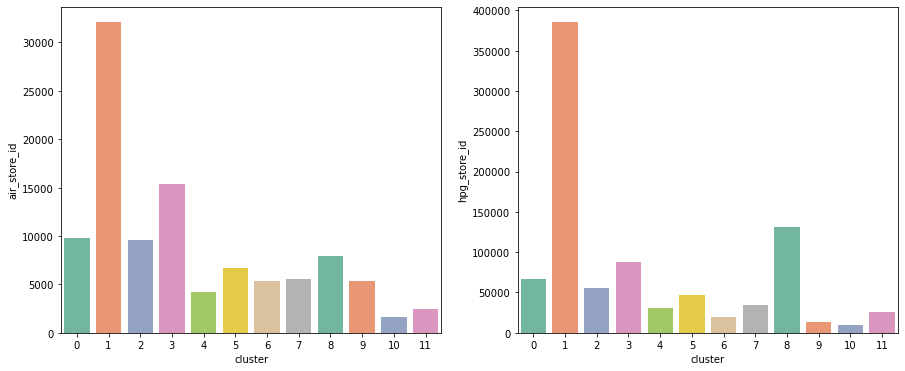

In [36]:
# Looking at cluster histograms
fig,ax = plt.subplots(1,2,figsize=(15,6))
cluster_histogram = df_full.groupby(['cluster'],as_index=False).count()
sns.barplot(x=cluster_histogram['cluster'],y=cluster_histogram['air_store_id'],ax=ax[0], palette= "Set2")
sns.barplot(x=cluster_histogram['cluster'],y=cluster_histogram['hpg_store_id'],ax=ax[1], palette= "Set2")
plt.show()

In [37]:
cluster_histogram

,cluster,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors,hpg_genre_name,hpg_area_name,latitude,longitude,air_store_id,air_genre_name,air_area_name
0,0,66771,71610,71610,71610,63317,63317,71610,71610,9771,8293,8293
1,1,385196,401934,401934,401934,372936,372936,401934,401934,32094,28998,28998
2,2,55174,59459,59459,59459,51135,51135,59459,59459,9588,8324,8324
3,3,87283,96026,96026,96026,82756,82756,96026,96026,15362,13270,13270
4,4,30954,34913,34913,34913,30711,30711,34913,34913,4202,4202,4202
5,5,47429,50225,50225,50225,44175,44175,50225,50225,6649,6050,6050
6,6,19405,22417,22417,22417,17479,17479,22417,22417,5306,4938,4938
7,7,34637,36354,36354,36354,32368,32368,36354,36354,5537,3986,3986
8,8,131377,136345,136345,136345,129901,129901,136345,136345,7983,6444,6444
9,9,13542,16092,16092,16092,11910,11910,16092,16092,5364,4182,4182


In [38]:
# Defining cluster count
cluster_count = cluster_histogram['cluster'].count()

In [39]:
# Define a base map
japan_map = gpd.read_file("../Datasets/restaurants_japan/Igismap/Japan_Boundary.shp")

In [40]:
# Defining colormaps for clusters
cm = plt.get_cmap('Set2')
colors = [cm(2.*i/cluster_count) for i in range(cluster_count)]
colored = [colors[i] for i in df_full['cluster']]

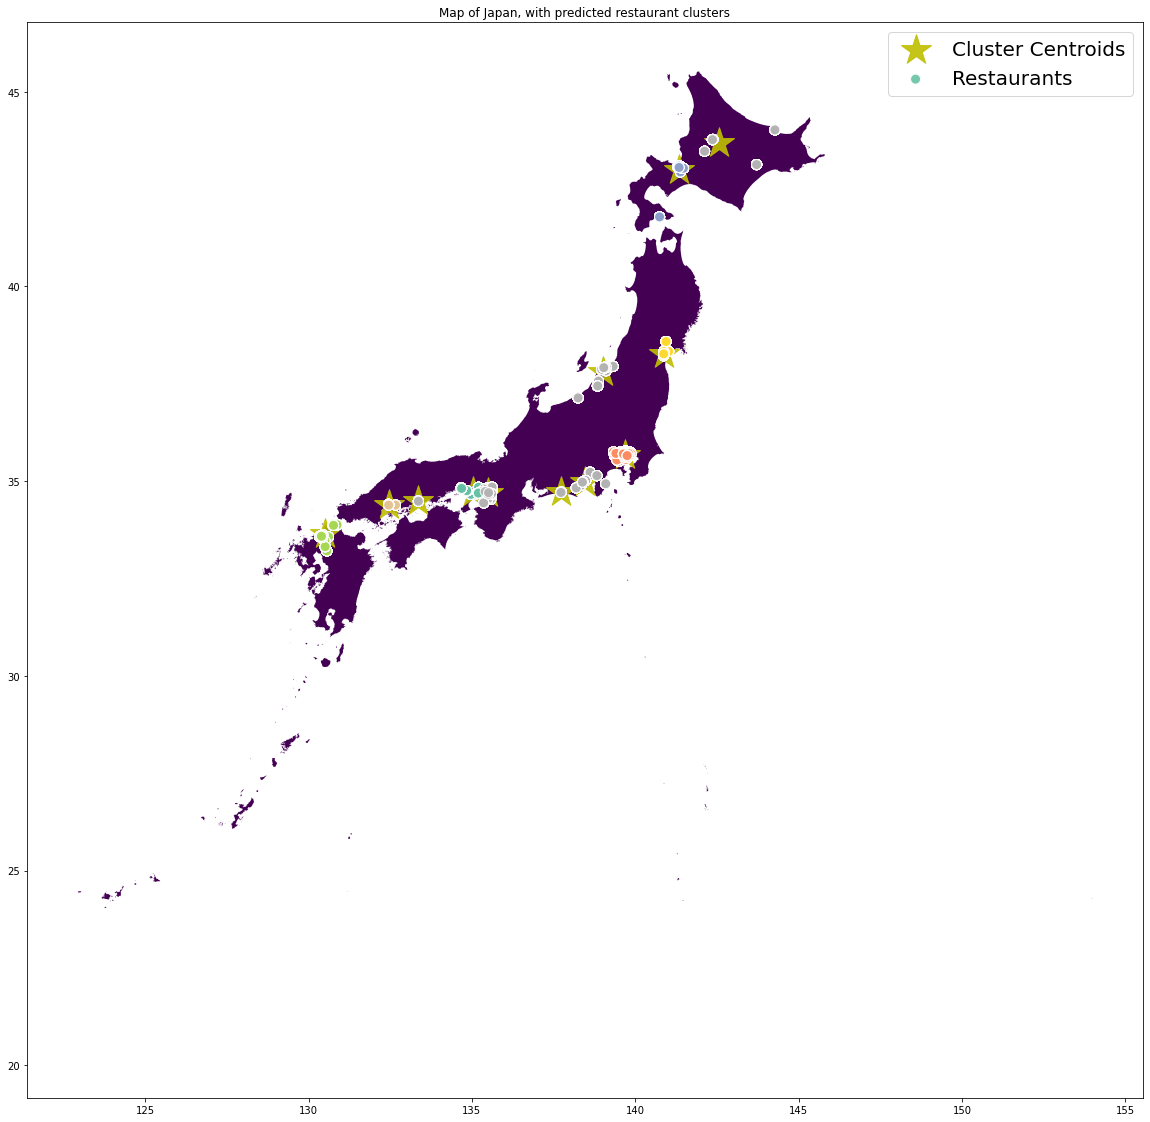

In [41]:

fig,ax = plt.subplots(figsize = (20,20))
# Base map
ax1 = japan_map.plot(ax = ax,cmap = 'viridis')
# Plotting cluster centroids 
x = cluster_centers[:,0]
y = cluster_centers[:,1]
ax2 = ax.scatter(x,y ,c= 'y', s = 1000,alpha = 0.9, edgecolors='y', label = 'Cluster Centroids', marker='*')
# Plotting restaurants 
x2 = df_full['longitude']
y2 = df_full['latitude']
ax3 = ax.scatter(x2,y2 ,c= colored, s = 100 , alpha = 0.9,edgecolors='w',label = 'Restaurants')

plt.legend(prop={'size': 20})
plt.title('Map of Japan, with predicted restaurant clusters')


plt.show()

In [138]:
# Looking at aggregations for day of the week, hours of the day

#Group by days
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
week_df_visit = df_full.groupby(df_full['visit_datetime'].dt.day_name()).count().reindex(days)

In [139]:
df_full

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors,hpg_genre_name,hpg_area_name,latitude,longitude,air_store_id,air_genre_name,air_area_name,cluster
visit_datetime,,,,,,,,,,,,
2016-01-01 13:00:00,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698,NaN,NaN,NaN,0
2016-01-02 12:00:00,hpg_dac72789163a3f47,2016-01-02 12:00:00,2016-01-01 20:00:00,2,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698,NaN,NaN,NaN,0
2016-01-03 19:00:00,hpg_dac72789163a3f47,2016-01-03 19:00:00,2016-01-02 15:00:00,2,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698,NaN,NaN,NaN,0
2016-01-06 12:00:00,hpg_dac72789163a3f47,2016-01-06 12:00:00,2016-01-06 08:00:00,2,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698,NaN,NaN,NaN,0
2016-01-10 17:00:00,hpg_dac72789163a3f47,2016-01-10 17:00:00,2016-01-04 22:00:00,3,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-05-16 19:00:00,NaN,2017-05-16 19:00:00,2017-04-20 19:00:00,3,NaN,NaN,35.658068,139.751599,air_b3a824511477a4ed,Japanese food,Tōkyō-to Minato-ku Shibakōen,1
2017-05-21 18:00:00,NaN,2017-05-21 18:00:00,2017-04-20 19:00:00,4,NaN,NaN,35.658068,139.751599,air_b3a824511477a4ed,Japanese food,Tōkyō-to Minato-ku Shibakōen,1
2017-05-21 19:00:00,NaN,2017-05-21 19:00:00,2017-04-20 19:00:00,2,NaN,NaN,35.658068,139.751599,air_b3a824511477a4ed,Japanese food,Tōkyō-to Minato-ku Shibakōen,1


In [132]:
# Looking at times
time_df_visit = df_full
time_df_visit.index = time_df_visit['visit_datetime']

time_df_visit = time_df_visit.drop(['latitude','longitude'], axis = 1)

In [133]:
time_df_visit = time_df_visit.groupby(time_df_visit.index.hour).count()

In [134]:
time_df_visit.head()

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors,hpg_genre_name,hpg_area_name,air_store_id,air_genre_name,air_area_name,cluster
visit_datetime,,,,,,,,,,
0,1082,1308,1308,1308,878,878,450,430,430,1308
1,726,923,923,923,593,593,338,330,330,923
2,278,379,379,379,190,190,191,189,189,379
3,151,198,198,198,80,80,119,118,118,198
4,95,110,110,110,55,55,56,55,55,110


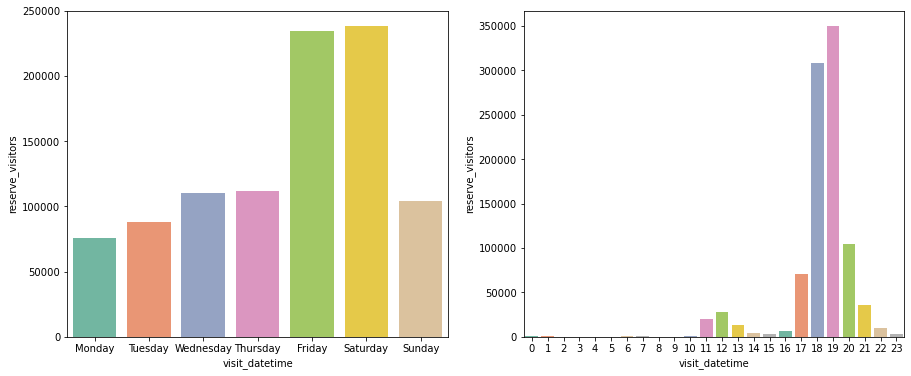

In [145]:
# Looking at time of day and day of week hisograms for actual visitors
fig,ax = plt.subplots(1,2,figsize=(15,6))
sns.barplot(x=week_df_visit.index,y=week_df_visit['reserve_visitors'],ax=ax[0], palette= "Set2")
sns.barplot(x=time_df_visit.index,y=time_df_visit['reserve_visitors'],ax=ax[1], palette= "Set2")
plt.show()

In [ ]:
# As expected, Friday and Sturday dinner times are massively more statistically relevant than other times and days

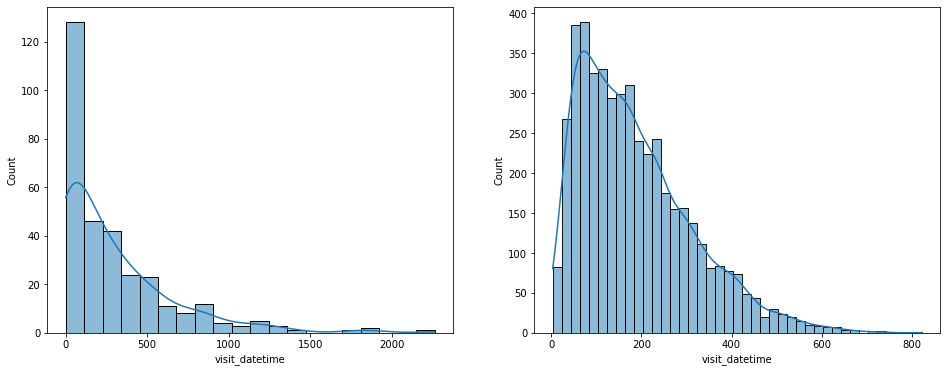

In [157]:
# Distribution of
fig,ax = plt.subplots(1,2,figsize=(16,6))
air_histogram = df_air.groupby(['air_store_id']).count()
sns.histplot(air_histogram['visit_datetime'], kde = True, ax=ax[0])
hpg_histogram = df_hpg.groupby(['hpg_store_id']).count()
sns.histplot(hpg_histogram['visit_datetime'], kde = True, ax=ax[1])
plt.show()

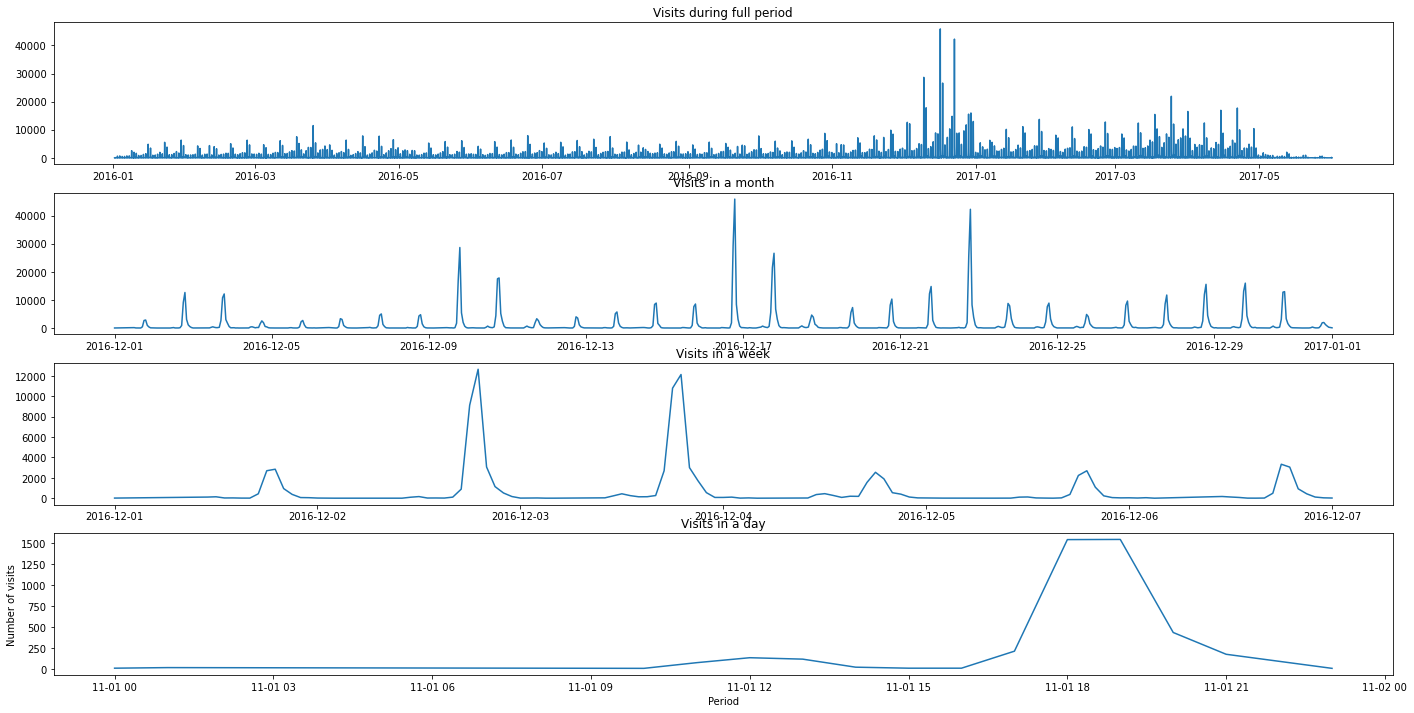

In [225]:
# Number of visits in any given day, month and week

fig,(ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize = (24,12))
ax1.plot(cum_df_visit['reserve_visitors'])
ax1.set_title("Visits during full period")
plt.ylabel("Number of visit")
ax2.plot(cum_df_visit['reserve_visitors']['2016-12-01 00:00:00':'2017-01-01 0:00:00'])
ax2.set_title("Visits in a month")
plt.ylabel("Number of visits")
ax3.plot(cum_df_visit['reserve_visitors']['2016-12-01 00:00:00':'2016-12-07 0:00:00'])
ax3.set_title("Visits in a week")
plt.ylabel("Number of visits")
ax4.plot(cum_df_visit['reserve_visitors']['2016-11-01 00:00:00':'2016-11-02 00:00:00'])
ax4.set_title("Visits in a day")
plt.ylabel("Number of visits")
plt.xlabel("Period")
plt.show()

In [254]:
# Looking at discrepancy between number of reservations and actual visits for same time ranges

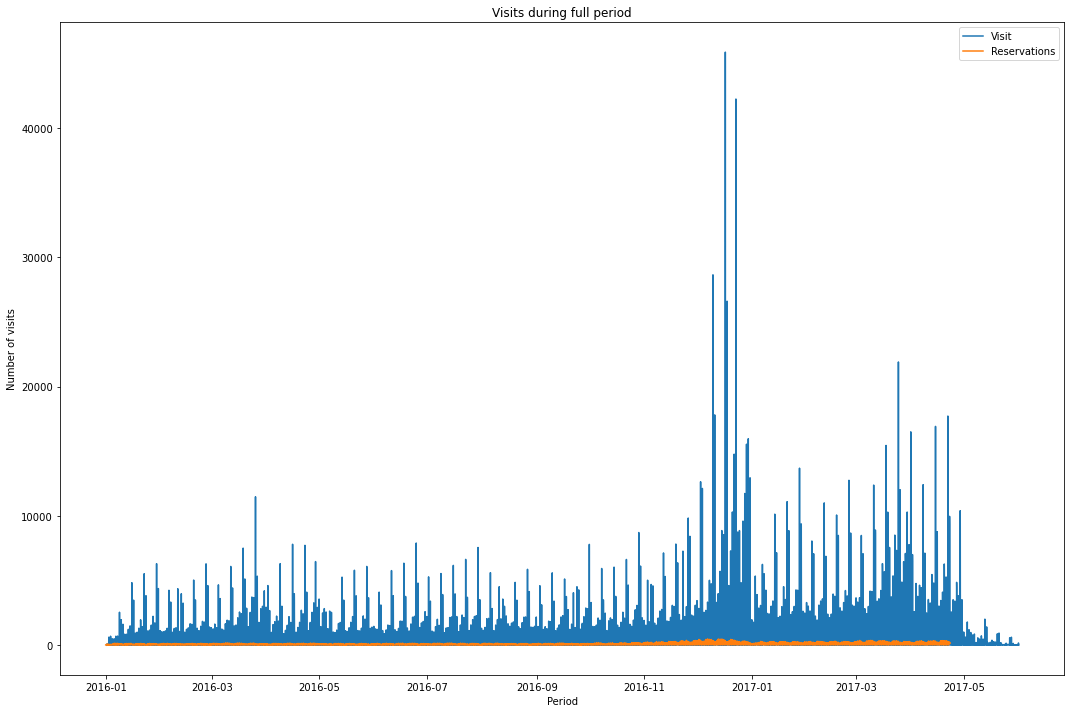

In [246]:
fig,ax1 = plt.subplots(figsize = (18,12))
ax1.plot(cum_df_visit['reserve_visitors'], label = 'Visit')
ax1.plot(cum_df_reserve['reserve_visitors'], label = 'Reservations')
ax1.set_title("Visits vs Reservations during full period")
plt.ylabel("Number of visits")
plt.xlabel("Period")
plt.legend()
plt.show()

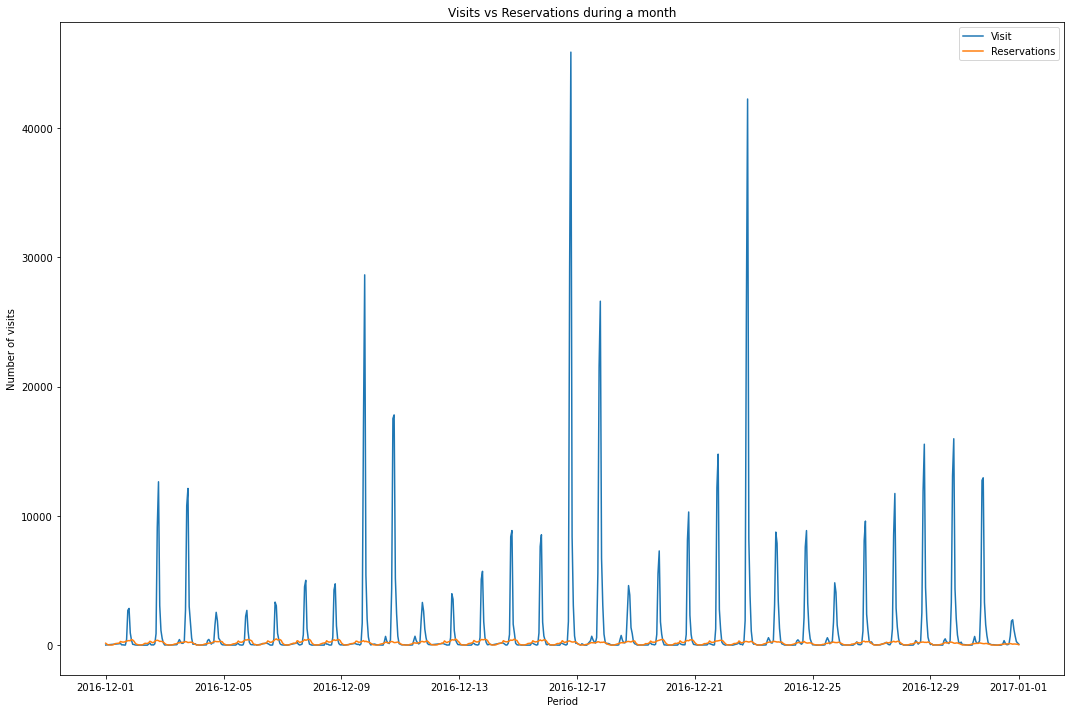

In [247]:
fig,ax1 = plt.subplots(figsize = (18,12))
ax1.plot(cum_df_visit['reserve_visitors']['2016-12-01 00:00:00':'2017-01-01 0:00:00'], label = 'Visit')
ax1.plot(cum_df_reserve['reserve_visitors']['2016-12-01 00:00:00':'2017-01-01 0:00:00'], label = 'Reservations')
ax1.set_title("Visits vs Reservations during a month")
plt.ylabel("Number of visits")
plt.xlabel("Period")
plt.legend()
plt.show()

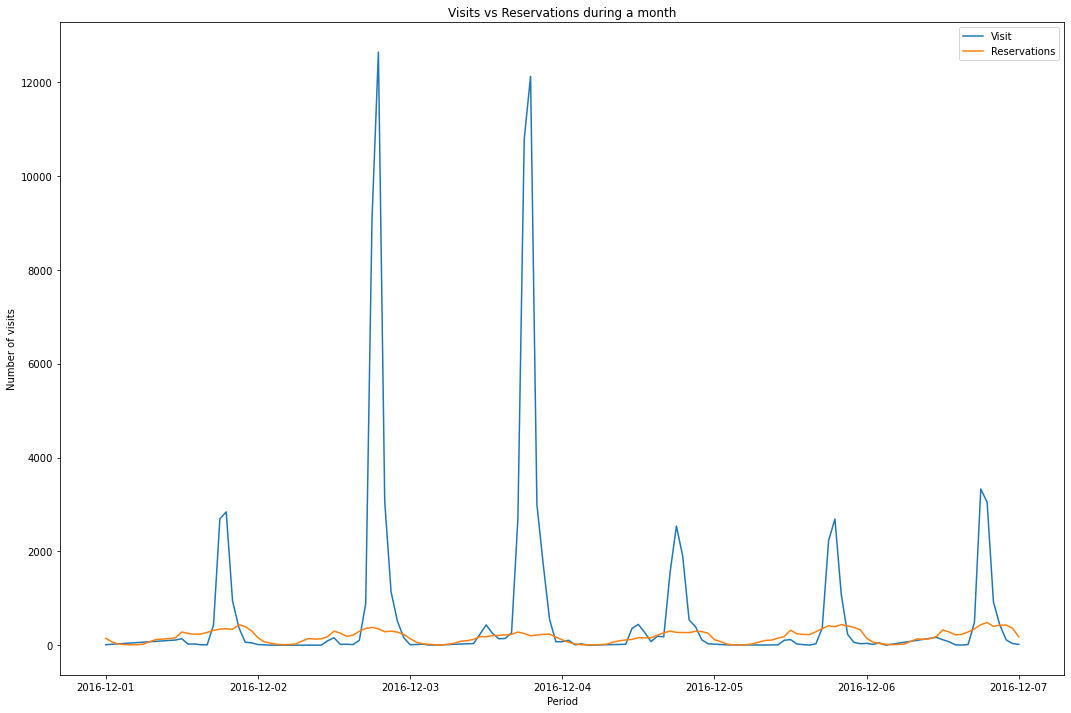

In [248]:
fig,ax1 = plt.subplots(figsize = (18,12))
ax1.plot(cum_df_visit['reserve_visitors']['2016-12-01 00:00:00':'2016-12-07 0:00:00'], label = 'Visit')
ax1.plot(cum_df_reserve['reserve_visitors']['2016-12-01 00:00:00':'2016-12-07 0:00:00'], label = 'Reservations')
ax1.set_title("Visits vs Reservations during a month")
plt.ylabel("Number of visits")
plt.xlabel("Period")
plt.legend()
plt.show()

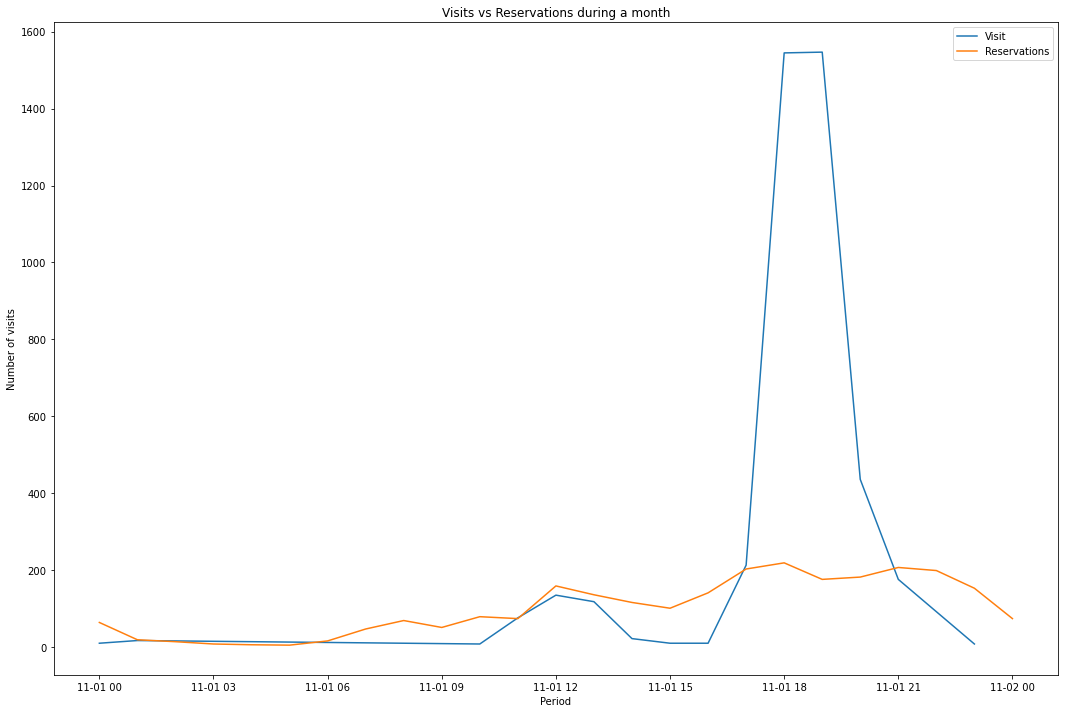

In [249]:
fig,ax1 = plt.subplots(figsize = (18,12))
ax1.plot(cum_df_visit['reserve_visitors']['2016-11-01 00:00:00':'2016-11-02 00:00:00'], label = 'Visit')
ax1.plot(cum_df_reserve['reserve_visitors']['2016-11-01 00:00:00':'2016-11-02 00:00:00'], label = 'Reservations')
ax1.set_title("Visits vs Reservations during a month")
plt.ylabel("Number of visits")
plt.xlabel("Period")
plt.legend()
plt.show()

In [255]:
# Can see that in any given time window, many more people visit instead of reserve.

In [279]:
# Looking at aggregated windows

m1 = cum_df_visit['reserve_visitors'].groupby(by=[cum_df_visit.index.month]).sum()
m1_res = cum_df_reserve['reserve_visitors'].groupby(by=[cum_df_reserve.index.month]).sum()
m2 = cum_df_visit['reserve_visitors'].groupby(by=[cum_df_visit.index.weekday]).sum()
m2_res = cum_df_reserve['reserve_visitors'].groupby(by=[cum_df_reserve.index.weekday]).sum()
m3 = cum_df_visit['reserve_visitors'].groupby(by=[cum_df_visit.index.hour]).sum()
m3_res = cum_df_reserve['reserve_visitors'].groupby(by=[cum_df_reserve.index.hour]).sum()

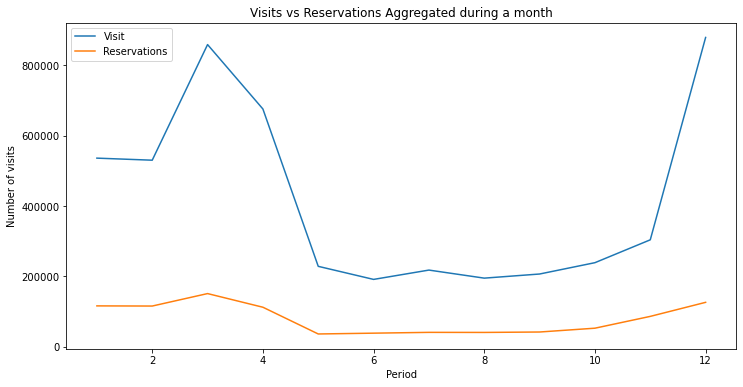

In [280]:
fig,ax1 = plt.subplots(figsize = (12,6))
ax1.plot(m1, label = 'Visit')
ax1.plot(m1_res, label = 'Reservations')
ax1.set_title("Visits vs Reservations Aggregated during a month")
plt.ylabel("Number of visits")
plt.xlabel("Period")
plt.legend()
plt.show()

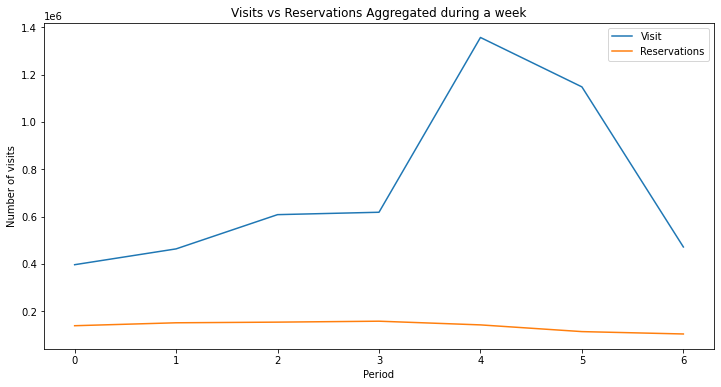

In [281]:
fig,ax1 = plt.subplots(figsize = (12,6))
ax1.plot(m2, label = 'Visit')
ax1.plot(m2_res, label = 'Reservations')
ax1.set_title("Visits vs Reservations Aggregated during a week")
plt.ylabel("Number of visits")
plt.xlabel("Period")
plt.legend()
plt.show()

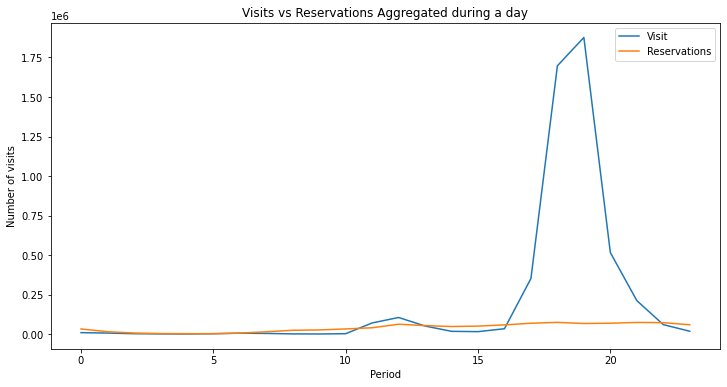

In [282]:
fig,ax1 = plt.subplots(figsize = (12,6))
ax1.plot(m3, label = 'Visit')
ax1.plot(m3_res, label = 'Reservations')
ax1.set_title("Visits vs Reservations Aggregated during a day")
plt.ylabel("Number of visits")
plt.xlabel("Period")
plt.legend()
plt.show()

In [284]:
cum_df_reserve.describe()

,hpg_store_id,visit_datetime,reserve_visitors,hpg_genre_name,hpg_area_name,latitude,longitude,air_store_id,air_genre_name,air_area_name,cluster
count,11421.000000,11421.000000,11421.000000,11421.000000,11421.000000,11421.000000,11421.000000,11421.000000,11421.000000,11421.000000,11421.000000
mean,79.465196,84.378426,84.378426,76.289992,76.289992,84.378426,84.378426,9.272918,8.088434,8.088434,84.378426
std,69.090040,75.594120,75.594120,64.656839,64.656839,75.594120,75.594120,14.424434,13.655207,13.655207,75.594120
min,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,25.000000,26.000000,26.000000,25.000000,25.000000,26.000000,26.000000,1.000000,0.000000,0.000000,26.000000
50%,65.000000,68.000000,68.000000,64.000000,64.000000,68.000000,68.000000,3.000000,2.000000,2.000000,68.000000
75%,109.000000,114.000000,114.000000,106.000000,106.000000,114.000000,114.000000,11.000000,10.000000,10.000000,114.000000
max,446.000000,483.000000,483.000000,426.000000,426.000000,483.000000,483.000000,110.000000,106.000000,106.000000,483.000000


In [285]:
cum_df_visit.describe()

,reserve_visitors,latitude,longitude
count,8678.000000,8678.000000,8678.000000
mean,583.401705,3986.808907,15265.932577
std,1732.768743,10540.377157,40320.073227
min,1.000000,33.211967,130.339313
25%,14.000000,106.546991,414.190165
50%,66.000000,499.756220,1923.463849
75%,333.000000,2505.494825,9631.386188
max,45880.000000,195271.920587,749806.683600
